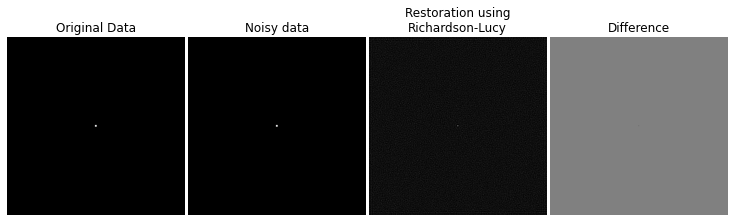

In [27]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration

astro_orig = np.zeros((512, 512), dtype=np.float32)
astro_orig[255, 255] = 10000.

psf = np.ones((5, 5)) / 25
astro = astro_orig.copy()
astro = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

# Restore Image using Richardson-Lucy algorithm
deconvolved_RL = restoration.richardson_lucy(astro_noisy, psf, iterations=50)

fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 5))
plt.gray()

for a in (ax[0], ax[1], ax[2], ax[3]):
       a.axis('off')

ax[0].imshow(astro)
ax[0].set_title('Original Data')

ax[1].imshow(astro_noisy)
ax[1].set_title('Noisy data')

ax[2].imshow(deconvolved_RL) #, vmin=astro_noisy.min(), vmax=astro_noisy.max())
ax[2].set_title('Restoration using\nRichardson-Lucy')

ax[3].imshow(deconvolved_RL - astro_orig, vmax=astro_orig.max(), vmin=-astro_orig.max())
ax[3].set_title('Difference')


fig.subplots_adjust(wspace=0.02, hspace=0.2,
                    top=0.9, bottom=0.05, left=0, right=1)
plt.show()

In [28]:
print(deconvolved_RL.max())

1.0
